In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import pytry
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
data = pd.DataFrame(pytry.read('theta15'))
data = data.reset_index(drop=True)
list = [col for col in data if col.startswith('output')]
for i in list:
    data2=data[i].apply(pd.Series)
    data[i]=data2.iloc[:,1]
data

,classify_aim,classify_test,classify_train,len_train,n_dims,n_epoch,output_aim0000,output_aim0001,output_aim0002,output_aim0003,...,output_train9992,output_train9993,output_train9994,output_train9995,output_train9996,output_train9997,output_train9998,output_train9999,p_seed,seed
0,0.200,0.2415,0.9960,500,2,1,[-0.18024541],[-0.27902024],[-0.35608877],[-0.42700087],...,[-0.9463246],[-0.91338244],[-0.89534336],[-0.88766681],[-0.92089616],[-0.99552466],[-0.94342107],[-0.91792781],2,2
1,0.419,0.7700,0.9953,500,2,1,[-0.5406985],[-0.58165455],[-0.61624151],[-0.65318588],...,[-0.54159896],[-0.50908441],[-0.48439036],[-0.41086783],[-0.35155248],[-0.30935729],[-0.23205073],[-0.20548856],3,3
2,0.384,0.2575,0.9931,500,2,1,[-0.52428506],[-0.66071771],[-0.74248793],[-0.80345514],...,[-0.79563985],[-0.7033846],[-0.74745011],[-0.73679237],[-0.77094253],[-0.77970044],[-0.70730086],[-0.57285876],4,4
3,0.431,0.2635,0.9548,500,2,1,[0.86982616],[0.86508127],[0.8551637],[0.84166834],...,[-1.06660889],[-1.09665206],[-1.08147526],[-1.06848337],[-1.04706625],[-1.01625379],[-0.98029746],[-0.94365268],5,5
4,0.325,0.3405,0.9868,500,2,1,[0.44691588],[0.4341899],[0.33582628],[0.21789639],...,[-0.97956921],[-0.98357704],[-0.98966602],[-0.9908534],[-0.99298127],[-0.98740031],[-0.96801769],[-0.94931939],6,6
5,0.480,0.2810,0.9867,500,2,1,[1.25498801],[1.14183962],[1.07885703],[1.04374922],...,[-0.50586638],[-0.50913299],[-0.56395401],[-0.65292991],[-0.67778298],[-0.67284163],[-0.64468625],[-0.61015532],7,7
6,0.159,0.3930,0.9592,500,2,1,[-0.57521845],[-0.58081034],[-0.60771216],[-0.63119364],...,[-1.07136656],[-1.07093654],[-1.01112619],[-0.93029488],[-0.89318995],[-0.89282826],[-0.95152733],[-0.90291061],8,8
7,0.516,0.2550,0.9984,500,2,1,[-0.69142319],[-0.72596527],[-0.76134266],[-0.78930224],...,[-0.83757346],[-0.83959362],[-0.85051555],[-0.86003205],[-0.85230815],[-0.83082574],[-0.81737889],[-0.81028863],9,9
8,0.330,0.5550,0.9960,500,2,1,[0.15759893],[0.18343463],[0.21230501],[0.23981356],...,[-0.99166679],[-0.98616244],[-0.9787634],[-0.96593169],[-0.9550113],[-0.95608687],[-0.95516545],[-0.95632369],10,10
9,0.315,0.0575,0.9811,500,2,1,[-0.07330731],[-0.08731235],[-0.05584973],[-0.04997599],...,[-0.87075015],[-0.89245225],[-0.93474193],[-0.90203018],[-0.95398819],[-0.93659265],[-0.8819332],[-0.83184915],11,11


In [3]:
list = [col for col in data if col.startswith('output_train')]
print(len(list))
list = [col for col in data if col.startswith('output_test')]
print(len(list))
list = [col for col in data if col.startswith('output_aim')]
print(len(list))

10000
2000
1000


Text(0.5,1,'noplay training')

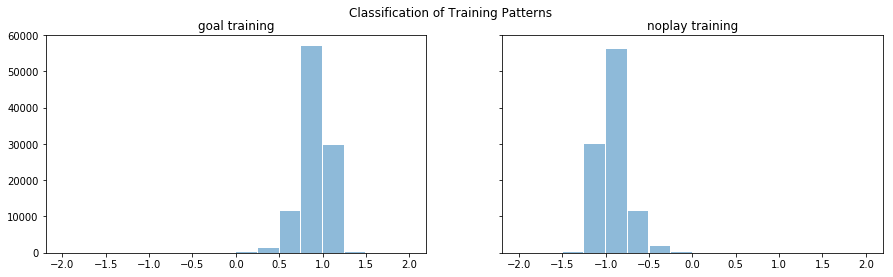

In [4]:
goal_training = pd.DataFrame({'goal_training': pd.concat([eval('data.output_train%04d' % i) for i in range(5000)])})
noplay_training = pd.DataFrame({'noplay_training': pd.concat([eval('data.output_train%04d' % i) for i in range(5000,10000)])})
                               
                                
goal_train = []
for i in range(len(goal_training)):
    a = goal_training.iloc[i].values
    #b = np.concatenate(a).ravel().tolist()
    goal_train.append(a)
goal_train = np.asarray(goal_train)
                                
noplay_train = []
for i in range(len(noplay_training)):
    a = noplay_training.iloc[i].values
    #b = np.concatenate(a).ravel().tolist()
    noplay_train.append(a)
noplay_train = np.asarray(noplay_train)
     
bins=np.arange(-2, 2 + 0.25, 0.25)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 4))
f.suptitle('Classification of Training Patterns')
ax1.hist(goal_train, bins=bins, rwidth=0.95, alpha=0.5, label='goal training')
ax1.set_title('goal training')
ax2.hist(noplay_train, bins=bins, rwidth=0.95, alpha=0.5, label='noplay training')
ax2.set_title('noplay training')

Text(0.5,1,'noplay testing')

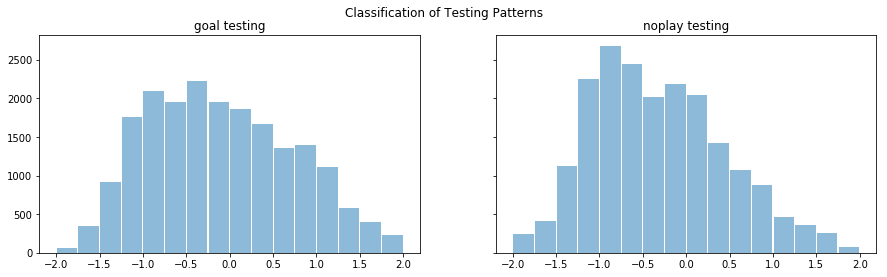

In [5]:
goal_testing = pd.DataFrame({'goal_testing': pd.concat([eval('data.output_test%04d' % i) for i in range(1000)])})
noplay_testing = pd.DataFrame({'noplay_testing': pd.concat([eval('data.output_test%04d' % i) for i in range(1000,2000)])})

goal_test = []
for i in range(len(goal_testing)):
    a = goal_testing.iloc[i].values
    #b = np.concatenate(a).ravel().tolist()
    goal_test.append(a)
goal_test = np.asarray(goal_test)
                                
noplay_test = []
for i in range(len(noplay_testing)):
    a = noplay_testing.iloc[i].values
    #b = np.concatenate(a).ravel().tolist()
    noplay_test.append(a)
noplay_test = np.asarray(noplay_test)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 4))
f.suptitle('Classification of Testing Patterns')
ax1.hist(goal_test, bins=bins, rwidth=0.95, alpha=0.5, label='goal testing')
ax1.set_title('goal testing')
ax2.hist(noplay_test, bins=bins, rwidth=0.95, alpha=0.5, label='noplay testing')
ax2.set_title('noplay testing')

Text(0.5,1,'aimless testing')

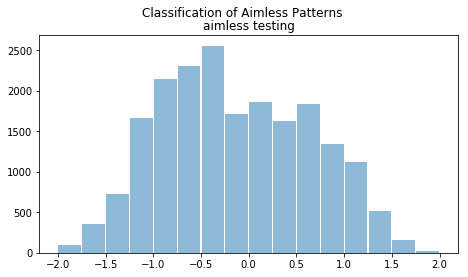

In [6]:
aimless = pd.DataFrame({'aimless_testing': pd.concat([eval('data.output_aim%04d' % i) for i in range (1000)])})

aim_test = []
for i in range(len(aimless)):
    a = aimless.iloc[i].values
    #b = np.concatenate(a).ravel().tolist()
    aim_test.append(a)
aim_test = np.asarray(aim_test)

f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(7.5, 4))
f.suptitle('Classification of Aimless Patterns')
ax1.hist(aim_test, bins=bins, rwidth=0.95, alpha=0.5, label='aimless testing')
ax1.set_title('aimless testing')

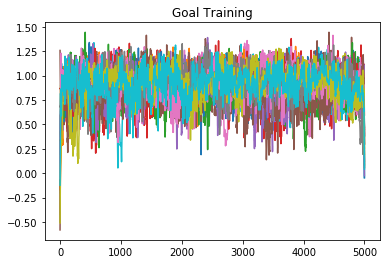

In [7]:
x = range(5000)
plt.figure()
for i in range(20):
    #plt.figure()
    plt.title('Goal Training') #%d' % i) 
    plt.plot(x,goal_training[i::20])

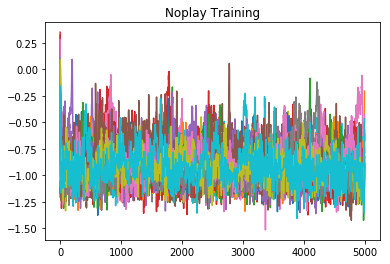

In [8]:
x = range(5000)
plt.figure()
for i in range(20):
    #plt.figure()
    plt.title('Noplay Training')# %d' % i) 
    plt.plot(x,noplay_training[i::20])

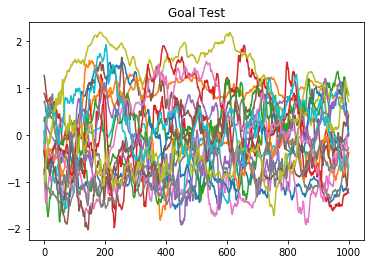

In [9]:
x = range(1000)
plt.figure()
for i in range(20):
    #plt.figure()
    plt.title('Goal Test')# %d' % i) 
    plt.plot(x,goal_test[i::20])

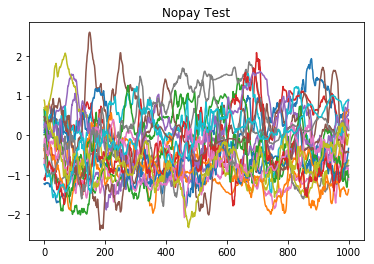

In [10]:
x = range(1000)
plt.figure()
for i in range(20):
    #plt.figure()
    plt.title('Nopay Test')# %d' % i) 
    plt.plot(x,noplay_test[i::20])

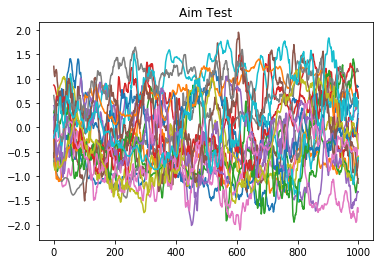

In [11]:
x = range(1000)
plt.figure()
for i in range(20):
    #plt.figure()
    plt.title('Aim Test')# %d' % i) 
    plt.plot(x,aim_test[i::20])

# Report Average Output Every Second

Text(0.5,1,'noplay training')

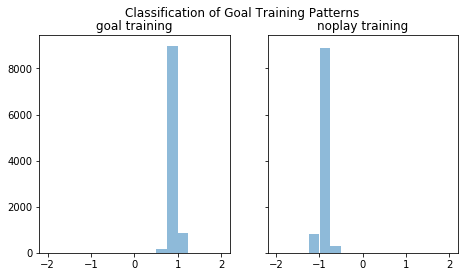

In [13]:
goal_training=goal_training.sort_index()
noplay_training=noplay_training.sort_index()

goaltrain_means = np.mean(goal_training.values.reshape(-1, 10), axis=1) #5000/500=10 so ave every 10 values
noplaytrain_means = np.mean(noplay_training.values.reshape(-1, 10), axis=1) #5000/500=10 so ave every 10 values

f, (ax1,ax2) = plt.subplots(1, 2, sharey=True, figsize=(7.5, 4))
f.suptitle('Classification of Training Patterns')
ax1.hist(np.hstack(goaltrain_means), bins=bins, rwidth=0.95, alpha=0.5, label='goal training')
ax1.set_title('goal training')
ax2.hist(np.hstack(noplaytrain_means), bins=bins, rwidth=0.95, alpha=0.5, label='noplay training')
ax2.set_title('noplay training')

Text(0.5,1,'noplay testing')

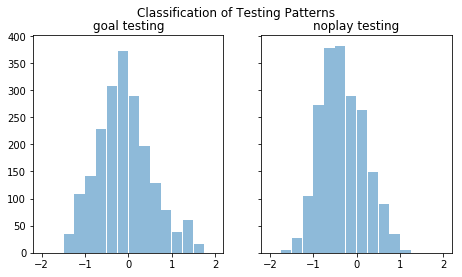

In [14]:
goal_testing=goal_testing.sort_index()
noplay_testing=noplay_testing.sort_index()

goaltest_means = np.mean(goal_testing.values.reshape(-1, 10), axis=1) #1000/100=10 so ave every 10 values
noplaytest_means = np.mean(noplay_testing.values.reshape(-1, 10), axis=1) #1000/100=10 so ave every 10 values

f, (ax1,ax2) = plt.subplots(1, 2, sharey=True, figsize=(7.5, 4))
f.suptitle('Classification of Testing Patterns')
ax1.hist(np.hstack(goaltest_means), bins=bins, rwidth=0.95, alpha=0.5, label='goal testing')
ax1.set_title('goal testing')
ax2.hist(np.hstack(noplaytest_means), bins=bins, rwidth=0.95, alpha=0.5, label='noplay testing')
ax2.set_title('noplay testing')

Text(0.5,1,'aimless testing')

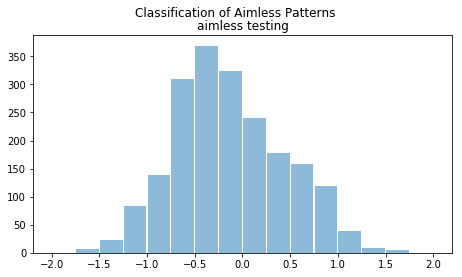

In [15]:
aimless=aimless.sort_index()

aimless_means = np.mean(aimless.values.reshape(-1, 10), axis=1) #1000/100=10 so ave every 10 values

f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(7.5, 4))
f.suptitle('Classification of Aimless Patterns')
ax1.hist(np.hstack(aimless_means), bins=bins, rwidth=0.95, alpha=0.5, label='aimless testing')
ax1.set_title('aimless testing')